###matplotlib 한글적용


In [1]:
!pip install konlpy wordcloud

In [2]:
import nltk
from konlpy.corpus import kobill

In [3]:
from konlpy.tag import Twitter
from collections import Counter

In [4]:
import pandas as pd
total_data = pd.read_excel('./beauty_scraping.xlsx')
total_data.head(10)




,star grade,review
0,4.0,지금 두 번째 펀딩 했는데 주름이 눈에 띄게 없어졌다라기 보다 아주 조금 옅어진것 ...
1,4.0,내부사정을 자세히 알지는 못하겠고\n좋은 소식은 아닌지라\n조심스럽고 제품 신뢰도가...
2,5.0,"아침저녁 세안후 첫세럼으로 사용중입니다\n피부에 큰 트러블이 있진 않지만, 속건조?..."
3,5.0,직원분들도 너무 친절하고 좋으셨구 제품도 정말 좋습니다. 저는 문의도 많았고 직원분...
4,5.0,1차 펀딩에 이어 3차 펀딩까지 참여했는데\n사용방법에 대해 제대로 알고 사용하니 ...
5,5.0,펀딩 번호 : 6291065\n아직 케이스 리뉴얼 된건 안 왔지만 잘 사용하고 있어...
6,3.0,현재는 만족합니다..앞으로 더 사용해봐야 겠네요
7,3.0,충격적이네요 재구매는 생각 해 봐야겠어요
8,4.0,"제풒이야 소문이 나서 더 이상의 말이 필요 없지만,\n직원들 해고의 문제가 있는 것..."
9,4.5,현재 두번째 바틀 사용중인데 효과는 그닥..? 그래도 안쓰는거보다는 훨 나을듯하여 ...


In [5]:
total_data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8005 entries, 0 to 8004
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   star grade  8005 non-null   float64
 1   review      8005 non-null   object 
dtypes: float64(1), object(1)
memory usage: 125.2+ KB


In [6]:
len(total_data)

8005

In [7]:
x_data = total_data['review']
y_data = total_data['star grade']

In [8]:

def make_y_data(val):
    if (1 <= val < 2):
        return 1
    elif (2 <= val < 3):
        return 2
    elif (3 <= val < 4):
        return 3
    elif (4 <= val < 5):
        return 4
    elif (5 <= val < 6):
        return 5
    else:
        return None

In [9]:
y_data = y_data.apply(lambda val:make_y_data(val))

In [10]:
y_data

0       4
1       4
2       5
3       5
4       5
       ..
8000    5
8001    5
8002    4
8003    5
8004    5
Name: star grade, Length: 8005, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6003,), (6003,), (2002,), (2002,))

In [13]:
!python -m pip install --upgrade pip

In [14]:
!python -m pip install konlpy

In [15]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0   103k      0 --:--:-- --:--:-- --:--:--  105k


In [16]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [17]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','')

3880    간절기 유수분밸런스가 유난히 안맞아서 힘들었는데 이 제품을 쓰고서 많이 나아졌어요 ...
4421                      알림신청 완료했습니다새로운 천진도 기대가 큽니다펀딩 번호
7388    엄청 촉촉하고 피부 진정효과가 좋아요 요새 여드름이 많이나서 스트레스였는데 많이 진...
2407    와진짜 후기를 안남길래야 안남길수가 없네요지금까지 년을 살면서 블랙헤드랑 피지 때문...
7603    인스타에 처음으로 올려봐요잘은 못했지만 나름 노력했어요 ㅎㅎ아주 민감한피부라 성분이...
                              ...                        
4922    와디즈 서포터명  사우트어제 제품을 받았는데 오늘에야 개봉을 했고내일부터 시작하려고...
964     꾸준히 사용중입니다 물러지지 않아 좋습니다드라마틱한 효과는 아직이지만 피부는 좋아지...
2176                                        감사합니다 잘 쓰겠습니다
2228                                        안쓸수없어용 너무 좋아요
6456    성분표가 똑같아서 업그레이드된게맞나했는데 맞다고하셔서 믿고 먼저 써봅니당워낙 기존것...
Name: review, Length: 6003, dtype: object

In [18]:
from konlpy.tag import Mecab

In [19]:
mecab = Mecab()

In [20]:
stopwords = ['의', '은', '는', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리'
, '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나'
, '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨'
, '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내'
, '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들'
, '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '걍', '과', '를', '으로', '자', '에', '와', '한', '하다']

In [21]:
import pickle

In [22]:
pickle.dump(stopwords, open('./stopwords.pkl','wb'))


In [23]:

sentence = list()

for tok in x_train:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence

[['간',
  '절기',
  '유수',
  '분',
  '밸런스',
  '유난히',
  '맞',
  '아서',
  '힘들',
  '었',
  '는데',
  '제품',
  '을',
  '쓰',
  '고서',
  '많이',
  '나아졌',
  '어요',
  '촉촉',
  '고',
  '자극',
  '아',
  '정착',
  '합니다',
  'ㅎㅎ',
  '만족',
  '합',
  '니당',
  '!',
  '추천',
  '추천',
  '!',
  '!',
  '패키지',
  '랑',
  '색상',
  '넘',
  '취향',
  '저격',
  '에요'],
 ['알림',
  '신청',
  '완료',
  '했',
  '습니다',
  '.',
  '새로운',
  '천진',
  '도',
  '기대',
  '큽니다',
  '.',
  '펀딩',
  '번호',
  '5963768'],
 ['엄청',
  '촉촉',
  '고',
  '피부',
  '진정',
  '효과',
  '아요',
  '!',
  '요새',
  '여드름',
  '많이',
  '서',
  '스트레스',
  '였',
  '는데',
  '많이',
  '진정',
  '고',
  '화이트헤드',
  '관리',
  '도',
  '쉬워졌',
  '어요',
  '!'],
 ['.',
  '.',
  '진짜',
  '후기',
  '남',
  '길래',
  '야',
  '남길',
  '네요',
  '까지',
  '2',
  'n',
  '을',
  '면서',
  '블랙',
  '헤드',
  '랑',
  '피지',
  '사',
  '본',
  '제품',
  '고',
  '다는',
  '건',
  '다',
  '해',
  '봤',
  '거든요',
  '?',
  '근데',
  '항상',
  '그때',
  '뿐',
  '었',
  '고',
  '블랙',
  '헤드',
  '돈',
  '쓰',
  '으리',
  '다짐',
  '했',
  '어요',
  '.',
  '.',
  '우연히',
  '디즈',
  '에서',
  '제품',


In [24]:
import tensorflow as tf


In [25]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()


In [26]:
tokenizer.fit_on_texts(sentence)


In [27]:
words=tokenizer.word_index
words


{'.': 1,
 '고': 2,
 '도': 3,
 '을': 4,
 '!': 5,
 '어요': 6,
 '게': 7,
 '는데': 8,
 '피부': 9,
 '사용': 10,
 ',': 11,
 '습니다': 12,
 '했': 13,
 '네요': 14,
 '제품': 15,
 '아요': 16,
 '해': 17,
 '펀딩': 18,
 '면': 19,
 '너무': 20,
 '쓰': 21,
 '어': 22,
 '었': 23,
 '다': 24,
 '아': 25,
 '로': 26,
 '거': 27,
 '느낌': 28,
 '겠': 29,
 '만': 30,
 '기': 31,
 '바르': 32,
 '지만': 33,
 '았': 34,
 '저': 35,
 '~': 36,
 '효과': 37,
 '라': 38,
 '해서': 39,
 '써': 40,
 '니': 41,
 '합니다': 42,
 '촉촉': 43,
 '어서': 44,
 '모공': 45,
 '?': 46,
 '입니다': 47,
 '만족': 48,
 '할': 49,
 '정말': 50,
 '제': 51,
 '얼굴': 52,
 '많이': 53,
 '던': 54,
 '아서': 55,
 '구매': 56,
 '향': 57,
 '서': 58,
 '..': 59,
 '요': 60,
 '까지': 61,
 '플': 62,
 '앰': 63,
 '면서': 64,
 '인': 65,
 '진짜': 66,
 '봤': 67,
 '에서': 68,
 '후': 69,
 'ㅎㅎ': 70,
 '건조': 71,
 ')': 72,
 '화장품': 73,
 '시': 74,
 '해요': 75,
 '보다': 76,
 '처음': 77,
 '세': 78,
 '인데': 79,
 '1': 80,
 '당고': 81,
 '세안': 82,
 '에요': 83,
 '흡수': 84,
 '더라구요': 85,
 ':': 86,
 '2': 87,
 '꾸준히': 88,
 '트러블': 89,
 '성': 90,
 '크림': 91,
 '화장': 92,
 '3': 93,
 '건': 94,
 '마스크': 95,
 '

In [28]:
tokenizer.word_counts


OrderedDict([('간', 77),
             ('절기', 1),
             ('유수', 36),
             ('분', 663),
             ('밸런스', 30),
             ('유난히', 8),
             ('맞', 579),
             ('아서', 1217),
             ('힘들', 83),
             ('었', 2445),
             ('는데', 4944),
             ('제품', 3138),
             ('을', 5626),
             ('쓰', 2628),
             ('고서', 22),
             ('많이', 1254),
             ('나아졌', 5),
             ('어요', 5078),
             ('촉촉', 1402),
             ('고', 14811),
             ('자극', 579),
             ('아', 2345),
             ('정착', 142),
             ('합니다', 1464),
             ('ㅎㅎ', 930),
             ('만족', 1347),
             ('합', 44),
             ('니당', 81),
             ('!', 5511),
             ('추천', 181),
             ('패키지', 144),
             ('랑', 377),
             ('색상', 47),
             ('넘', 545),
             ('취향', 28),
             ('저격', 9),
             ('에요', 740),
             ('알림', 50),
             ('신청', 12

In [29]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords





In [30]:

%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)




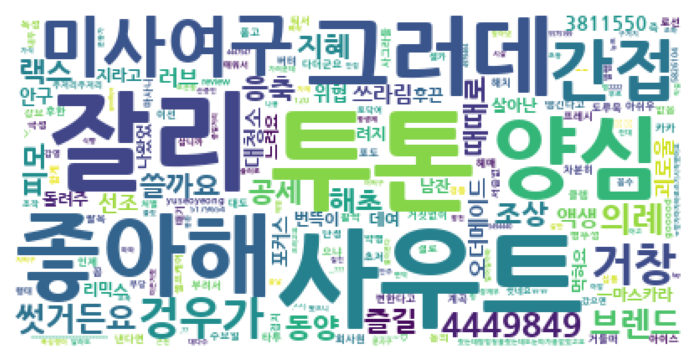

In [37]:


from wordcloud import WordCloud

data = words
path = './NanumGothicExtraBold.ttf'
wc = WordCloud(font_path = path, relative_scaling=0.2,
               background_color='white').generate_from_frequencies(dict(data))
plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()

